### Problem Statement 

Implement dynamic pricing strategies for fitness classes based on demand, time, and location

- cult.fit (formerly cure.fit or Curefit) is a health and fitness company offering digital and offline experiences across fitness, nutrition, and mental well-being. With the aim to make fitness fun and easy, cult.
- Provided with the raw data, we need to built a predictive pricing strategy model for improving the revenue of cult.fit

##### Buidling regression Modelling on the data to target the price 

###### Import all the necessary libraries

In [384]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###### Load Prepared Data

In [137]:
data = pd.read_excel('Data1_Cult_fit_Lakshmi.xlsx')

In [138]:
data

,Unnamed: 0,ActivitySiteID,BookingEndDateTime,BookingStartTime,MaxBookees,Number_Booked,Price,BookingEndMonth,BookingEndDay,Booking_Start_Hour,Booking_Start_Min,Activity,Activity_Time,Activity_Duration
0,0,BRP,2018-04-01,09:00:00,35,29,1499,4,1,9,0,BodyCombat,09:00AM - 10:00AM,60
1,1,BRP,2018-04-01,10:00:00,20,15,1999,4,1,10,0,HattonABC,10:00AM - 11:00AM,60
2,2,HXP,2018-04-01,10:00:00,27,20,1999,4,1,10,0,StudioCyc,10:00AM - 11:00AM,60
3,3,HXP,2018-04-01,09:05:00,27,27,1999,4,1,9,5,StudioCyc,09:05AM - 10:05AM,60
4,4,TSC,2018-04-01,10:00:00,30,13,1299,4,1,10,0,BodyConditioning,10:00AM - 11:00AM,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,3266,BRP,2018-06-30,09:00:00,35,21,1999,6,30,9,0,BodyAttack,09:00AM - 10:00AM,60
3267,3267,TSC,2018-06-30,08:30:00,24,11,2999,6,30,8,30,BarrePilates,08:30AM - 09:30AM,60
3268,3268,NBL,2018-06-30,12:00:00,60,9,2999,6,30,12,0,BarrePilates,12:00PM - 01:00PM,60
3269,3269,SBP,2018-06-30,08:30:00,20,6,3999,6,30,8,30,MMACond,08:30AM - 09:30AM,60


In [141]:
# drop Unnamed: 0 which is not required 
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

#### Cleaning the data / Pre Processing the data

In [55]:
data.columns

Index(['ActivitySiteID', 'BookingEndDateTime', 'BookingStartTime',
       'MaxBookees', 'Number_Booked', 'Price', 'BookingEndMonth',
       'BookingEndDay', 'Booking_Start_Hour', 'Booking_Start_Min', 'Activity',
       'Activity_Time', 'Activity_Duration'],
      dtype='object')

- No cleaning required, all the column names are in readable format

In [43]:
data.nunique()

ActivitySiteID         5
BookingEndDateTime    91
BookingStartTime      61
MaxBookees            20
Number_Booked         55
Price                  9
BookingEndMonth        3
BookingEndDay         31
Booking_Start_Hour    15
Booking_Start_Min     11
Activity              70
Activity_Time         61
Activity_Duration      1
dtype: int64

- All the columns are aligned with the unique values

In [45]:
data.dtypes

ActivitySiteID                object
BookingEndDateTime    datetime64[ns]
BookingStartTime              object
MaxBookees                     int64
Number_Booked                  int64
Price                          int64
BookingEndMonth                int64
BookingEndDay                  int64
Booking_Start_Hour             int64
Booking_Start_Min              int64
Activity                      object
Activity_Time                 object
Activity_Duration              int64
dtype: object

- The columns with object dtype should be encoded into a numerical format

In [47]:
cat_col = data.select_dtypes(include=['object'])
cat_col.columns

Index(['ActivitySiteID', 'BookingStartTime', 'Activity', 'Activity_Time'], dtype='object')

In [143]:
#using label encoder we'll convert the categorial data
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [145]:
data['ActivitySiteID'] = lc.fit_transform(data['ActivitySiteID'])

In [147]:
data['Activity'] = lc.fit_transform(data['Activity'])

In [149]:
data.head()

,ActivitySiteID,BookingEndDateTime,BookingStartTime,MaxBookees,Number_Booked,Price,BookingEndMonth,BookingEndDay,Booking_Start_Hour,Booking_Start_Min,Activity,Activity_Time,Activity_Duration
0,0,2018-04-01,09:00:00,35,29,1499,4,1,9,0,22,09:00AM - 10:00AM,60
1,0,2018-04-01,10:00:00,20,15,1999,4,1,10,0,34,10:00AM - 11:00AM,60
2,1,2018-04-01,10:00:00,27,20,1999,4,1,10,0,61,10:00AM - 11:00AM,60
3,1,2018-04-01,09:05:00,27,27,1999,4,1,9,5,61,09:05AM - 10:05AM,60
4,4,2018-04-01,10:00:00,30,13,1299,4,1,10,0,23,10:00AM - 11:00AM,60


In [72]:
data.columns

Index(['ActivitySiteID', 'BookingEndDateTime', 'BookingStartTime',
       'MaxBookees', 'Number_Booked', 'Price', 'BookingEndMonth',
       'BookingEndDay', 'Booking_Start_Hour', 'Booking_Start_Min', 'Activity',
       'Activity_Time', 'Activity_Duration'],
      dtype='object')

In [151]:
data1 = data[['ActivitySiteID', 
       'MaxBookees', 'Number_Booked', 'Price', 'BookingEndMonth',
       'BookingEndDay', 'Booking_Start_Hour', 'Booking_Start_Min', 'Activity',
        'Activity_Duration']]

In [153]:
data1.head()

,ActivitySiteID,MaxBookees,Number_Booked,Price,BookingEndMonth,BookingEndDay,Booking_Start_Hour,Booking_Start_Min,Activity,Activity_Duration
0,0,35,29,1499,4,1,9,0,22,60
1,0,20,15,1999,4,1,10,0,34,60
2,1,27,20,1999,4,1,10,0,61,60
3,1,27,27,1999,4,1,9,5,61,60
4,4,30,13,1299,4,1,10,0,23,60


In [155]:
data2 = data1.copy()

- Created copied data i.e data1 because on a scaled data 

                 1. Idea is to build linear and distance based algorithms

  
  
- Created data2 on a non scaled and non outlier analysed data

                2. Idea is to build Tree based algorithms

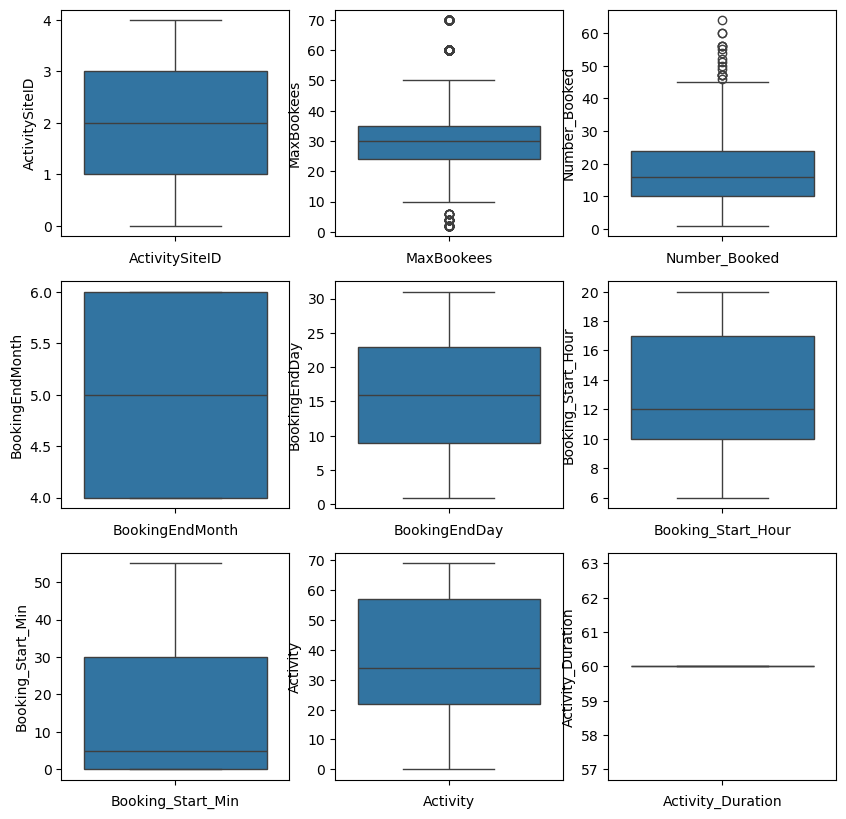

In [88]:
#outlier analsyis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plot = 1
for i in data1.drop('Price',axis=1):
  if plot <= 10:
    plt.subplot(3,3,plot)
    sns.boxplot(data[i])
    plt.xlabel(i)
    plot += 1
plt.show()

- Data is clean. The MaxBookees and the Number_Booked , retaining the way it is because the column is treated as the target in the modelling later(Time Series).
- Here in regression analysis it is retained the way because the prominence it holds in the data

##### Split the data

In [157]:
x = data1.drop(columns=['Price'],axis=1)
y = data1['Price']

##### Splitting into training and testing sets

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

##### Applying the scaling on the data

In [168]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Linear Regression

In [170]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [250]:
# predictions on the test data
y_pred_test = lr.predict(x_test)

In [252]:
#test score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

0.17578560465344129

In [258]:
#predictions on the train data
y_pred_train = lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.22694570225706756

In [264]:
# Calculate residuals
train_residuals1 = y_train - y_pred_train
test_residuals1 = y_test - y_pred_test

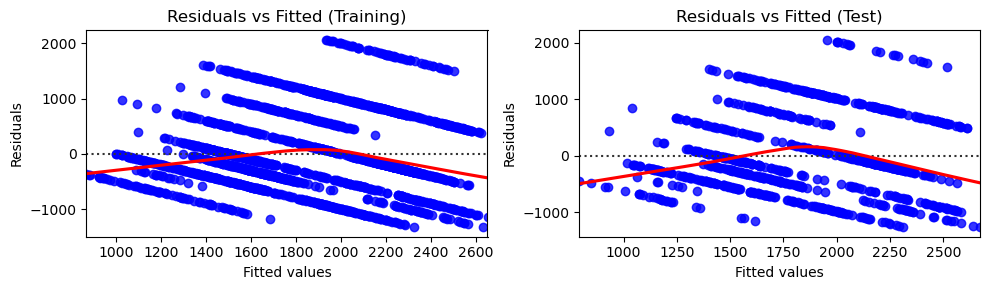

In [270]:
# Plot residuals for training data
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred_train, y=train_residuals1, lowess=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Training)')

# Plot residuals for test data
plt.subplot(1, 2, 2)
sns.residplot(x=y_pred_test, y=test_residuals1, lowess=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Test)')

plt.tight_layout()
plt.show()

- The model tends to overfit and has some issues with training
- 0.1757 and this is the overall performance

#### Tree Based 

In [177]:
x = data2.drop(columns=['Price'],axis=1)
y = data2['Price']

In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

#### Implementing Decision Tree

In [189]:
from sklearn.tree import DecisionTreeClassifier        #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()             #object creation for decision tree
dt.fit(x_train,y_train)       #train the model

DecisionTreeClassifier()

In [281]:
#Predictions on the test data
y_test_pred1 = dt.predict(x_test)

In [285]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred1)

0.9752775605797579

In [275]:
#predictions on the train data
y_pred_train1 = dt.predict(x_train)
r2_score(y_train,y_pred_train1)

1.0

In [287]:
# Calculate residuals
train_residuals2 = y_train - y_pred_train1
test_residuals2 = y_test - y_test_pred1

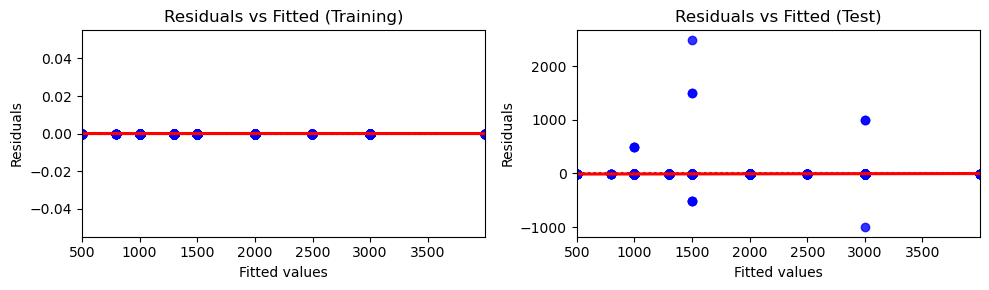

In [291]:
# Plot residuals for training data
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred_train1, y=train_residuals2, lowess=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Training)')

# Plot residuals for test data
plt.subplot(1, 2, 2)
sns.residplot(x=y_test_pred1, y=test_residuals2, lowess=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Test)')

plt.tight_layout()
plt.show()

- The perfromance of the model is good as the data points tends to round the fitted line
- The r2_score is coming to be 0.975

#### Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier   # importing randomforest

rf_clf = RandomForestClassifier() # Assigning RandomForest CLassifier into variable
rf_clf.fit(x_train,y_train)   # training the data

RandomForestClassifier()

In [296]:
#Predictions on the test data
y_test_pred2 = rf_clf.predict(x_test)

In [298]:
r2_score(y_test,y_test_pred2)

0.9922995680494328

In [300]:
#predictions on the train data
y_pred_train2 = rf_clf.predict(x_train)
r2_score(y_train,y_pred_train2)

1.0

In [308]:
# Calculate residuals
train_residuals3 = y_train - y_pred_train2
test_residuals3 = y_test - y_test_pred2

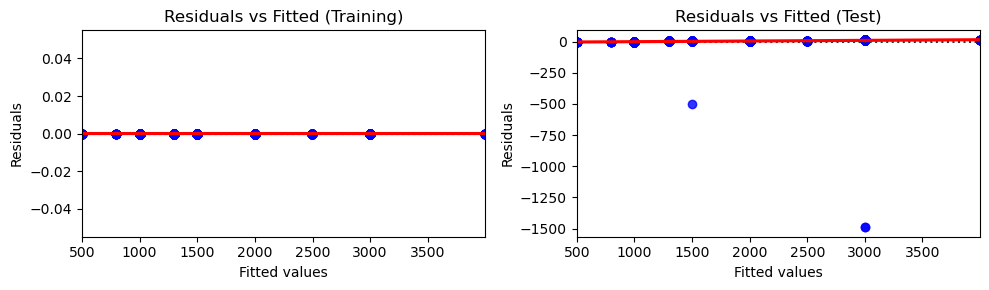

In [310]:
# Plot residuals for training data
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred_train2, y=train_residuals3, lowess=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Training)')

# Plot residuals for test data
plt.subplot(1, 2, 2)
sns.residplot(x=y_test_pred2, y=test_residuals3, lowess=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Test)')

plt.tight_layout()
plt.show()

- The overall perfomance of the model is good
- The performance of the model is 0.992

#### Gradient Boosting

In [219]:
from sklearn.ensemble import GradientBoostingClassifier  # Importing GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(x_train,y_train) ## fitting the data

GradientBoostingClassifier()

In [315]:
y_test_pred3 = gbm.predict(x_test)   # testing the model

In [317]:
r2_score(y_test,y_test_pred3)

0.9683877004134609

In [319]:
#predictions on the train data
y_pred_train3 = gbm.predict(x_train)
r2_score(y_train,y_pred_train3)

0.9982609914910291

In [321]:
# Calculate residuals
train_residuals4 = y_train - y_pred_train3
test_residuals4 = y_test - y_test_pred3

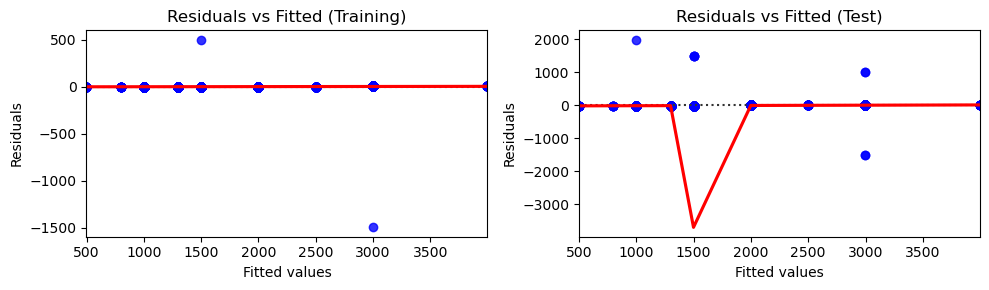

In [323]:
# Plot residuals for training data
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred_train3, y=train_residuals4, lowess=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Training)')

# Plot residuals for test data
plt.subplot(1, 2, 2)
sns.residplot(x=y_test_pred3, y=test_residuals4, lowess=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Test)')

plt.tight_layout()
plt.show()

- The fitted line is in test varies a little, but the data more or less surrounds the line
- The performance of the model is 0.968

#### XG Boost

In [330]:
from xgboost import XGBRegressor#importing the model library
xgb_r=XGBRegressor() ## object creation
xgb_r.fit(x_train,y_train)# fitting the data
y_pred4 = xgb_r.predict(x_test)  

In [332]:
r2_score(y_test,y_pred4)

0.9783821105957031

In [336]:
#predictions on the train data
y_pred_train5 = xgb_r.predict(x_train)
r2_score(y_train,y_pred_train5)

0.9998832941055298

In [340]:
# Calculate residuals
train_residuals5 = y_train - y_pred_train5
test_residuals5 = y_test - y_pred4

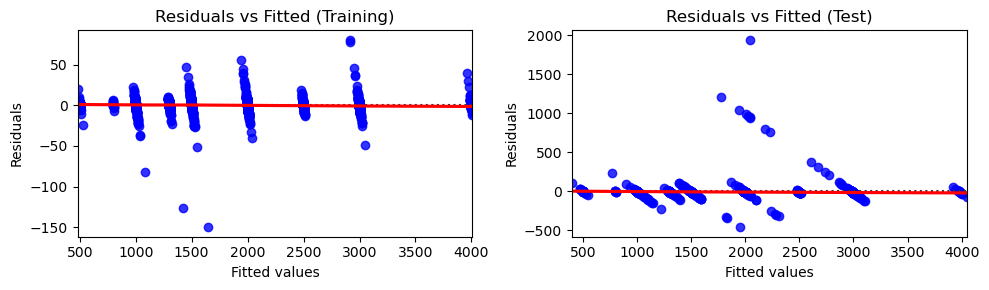

In [342]:
# Plot residuals for training data
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.residplot(x=y_pred_train5, y=train_residuals5, lowess=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Training)')

# Plot residuals for test data
plt.subplot(1, 2, 2)
sns.residplot(x=y_pred4, y=test_residuals5, lowess=True, color='blue', line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Test)')

plt.tight_layout()
plt.show()

- The datapoints show the same pattern even in train and testing phase
- The performance of the model is 0.978

<Figure size 800x500 with 0 Axes>

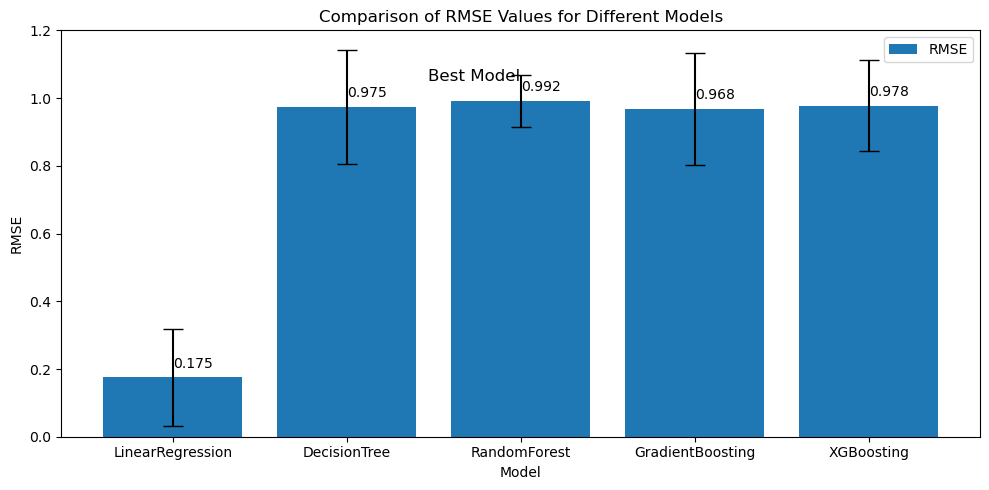

In [379]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
# Sample RMSE values for various models (replace with your actual data)
model_names = ["LinearRegression", "DecisionTree", "RandomForest", "GradientBoosting", "XGBoosting"]
rmse_values = [0.175, 0.975, 0.992, 0.968, 0.978]

# Create a bar chart with error bars
plt.figure(figsize=(10, 5))
bars = plt.bar(model_names, rmse_values, yerr=np.random.rand(len(rmse_values)) * 0.2,  # Random error bars for demonstration
              capsize=7, label='RMSE')  # Ensure error bars are shown

# Add RMSE values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02,  # Adjust yval + 0.02 to place the text slightly above the bar
             f'{yval:.3f}', ha='left', va='bottom', fontsize=10)


plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Values for Different Models')
plt.legend()

# Annotate the best model (assumed to be the model with the lowest RMSE)
best_model_index = np.argmax(rmse_values)
plt.text(best_model_index, rmse_values[best_model_index] + 0.05, "Best Model", fontsize=12, ha='right', va='bottom')

plt.tight_layout()
plt.show()


- Over all Random Forest is giving good performance as compared to all other models built